In [6]:
import os
import sys
import numpy as np
import pandas as pd
import seuif97
from matplotlib import pyplot as plt

data_path = "/Users/zfwang/project/data-analysis/eturb_model/data"
regression_data_path = "/Users/zfwang/project//data-analysis/eturb_model/result/regression"
result_data_path = "/Users/zfwang/project//dev/data-analysis/eturb_model/result"

In [7]:
def get_origin_data():
    """
    origin data
    """
    # raw data
    eturb_m1_data = pd.read_csv(os.path.join(data_path, "eturb_m1_1min_metrics-0817.csv"), header = 0, index_col = None)
    eturb_m2_data = pd.read_csv(os.path.join(data_path, "eturb_m2_1min_metrics-0817.csv"), header = 0, index_col = None)
    
    data = pd.DataFrame()
    # eturb_m1
    data["eturb_m1_steam_flow_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_flow_in"]
    data["eturb_m1_steam_pressure_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_in"]
    data["eturb_m1_steam_temperature_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_in"]
    data["eturb_m1_steam_flow_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_flow_side"]
    data["eturb_m1_steam_pressure_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_side"]
    data["eturb_m1_steam_temperature_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_side"]
    data["eturb_m1_steam_pressure_out"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_out"]
    data["eturb_m1_steam_temperature_out"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_out"]
    data["eturb_m1_electricity_generation"] = eturb_m1_data["ExtCondensTurbineOP.electricity_generation"]
    # eturb_m2
    data["eturb_m2_steam_flow_in"] = eturb_m2_data["ExtCondensTurbineOP.steam_flow_in"]
    data["eturb_m2_steam_pressure_in"] = eturb_m2_data["ExtCondensTurbineOP.steam_pressure_in"]
    data["eturb_m2_steam_temperature_in"] = eturb_m2_data["ExtCondensTurbineOP.steam_temperature_in"]
    data["eturb_m2_steam_flow_side"] = eturb_m2_data["ExtCondensTurbineOP.steam_flow_side"]
    data["eturb_m2_steam_pressure_side"] = eturb_m2_data["ExtCondensTurbineOP.steam_pressure_side"]
    data["eturb_m2_steam_temperature_side"] = eturb_m2_data["ExtCondensTurbineOP.steam_temperature_side"]
    data["eturb_m2_steam_pressure_out"] = eturb_m2_data["ExtCondensTurbineOP.steam_pressure_out"]
    data["eturb_m2_steam_temperature_out"] = eturb_m2_data["ExtCondensTurbineOP.steam_temperature_out"]
    data["eturb_m2_electricity_generation"] = eturb_m2_data["ExtCondensTurbineOP.electricity_generation"]
    data = data.reset_index(drop = True)
    
    return data


def get_result_data():
    result_data = pd.DataFrame()
    file_names = [
        "eturb_m1_result_base",
        "eturb_m1_result_delta",
        "eturb_m1_result_origin",
        "eturb_m2_result_base",
        "eturb_m2_result_delta",
        "eturb_m2_result_origin"
    ]
    for name in file_names:
        temp_data = pd.read_csv(os.path.join(regression_data_path, "%s.csv" % name), header = 0, index_col = None)
        result_data = pd.concat([result_data, temp_data], axis = 1, sort = False)

    return result_data


def data_preprocessing(data, method, is_export_csv = 0):
    """
    data preprocessing
    """
    df = pd.DataFrame()
    if method == "origin":
        df = data
    elif method == "base":
        df = data
    elif method == "delta":
        df["eturb_m1_steam_flow_in"] = np.array(data["eturb_m1_steam_flow_in"].iloc[1:1441]) - np.array(data["eturb_m1_steam_flow_in"].iloc[0:1440])
        df["eturb_m1_steam_flow_side"] = np.array(data["eturb_m1_steam_flow_side"].iloc[1:1441]) - np.array(data["eturb_m1_steam_flow_side"].iloc[0:1440])
        df["eturb_m1_electricity_generation"] = np.array(data["eturb_m1_electricity_generation"].iloc[1:1441]) - np.array(data["eturb_m1_electricity_generation"].iloc[0:1440])
        df["eturb_m2_steam_flow_in"] = np.array(data["eturb_m2_steam_flow_in"].iloc[1:1441]) - np.array(data["eturb_m2_steam_flow_in"].iloc[0:1440])
        df["eturb_m2_steam_flow_side"] = np.array(data["eturb_m2_steam_flow_side"].iloc[1:1441]) - np.array(data["eturb_m2_steam_flow_side"].iloc[0:1440])
        df["eturb_m2_electricity_generation"] = np.array(data["eturb_m2_electricity_generation"].iloc[1:1441]) - np.array(data["eturb_m2_electricity_generation"].iloc[0:1440])
        if is_export_csv:
            df.to_csv(os.path.join(result_data_path, "raw_data.csv"), index = None)
    elif method == "mean":
        for i, j in zip(range(0, 1450, 10), range(60, 1450, 10)):
            temp_df = pd.DataFrame(data.iloc[i:j].mean(axis = 0))
            df = pd.concat([df, temp_df.transpose()], axis = 0, sort = False)
    
    return df


def scatter_plot(df, xlabel, *ylabels, imgpath = None):
    fig, axs = plt.subplots(figsize = (10, 7), sharey = True, tight_layout = True)
    for ylabel in ylabels:
        plt.scatter(df[xlabel], df[ylabel], label = ylabel)
        plt.title("%s VS %s" % (xlabel, ylabel))
        plt.xlabel("%s" % xlabel)
        plt.ylabel("%s" % ylabel)
        plt.legend()
        if imgpath:
            plt.savefig(imgpath)
        plt.show()

## 1.Data

In [8]:
result_df = get_result_data()
result_df_origin = result_df[["eturb_m1_origin_k1", "eturb_m1_origin_k2"]].reset_index(drop = True)
result_df_delta = result_df[["eturb_m1_delta_k1", "eturb_m1_delta_k2"]].reset_index(drop = True)
result_df_base = result_df[["eturb_m1_base_k1", "eturb_m1_base_k2"]].reset_index(drop = True)
origin_data = get_origin_data()
origin_df = data_preprocessing(origin_data, method = "mean", is_export_csv = 0)
origin_df = origin_df[["eturb_m1_steam_pressure_in", "eturb_m1_steam_pressure_side"]].reset_index(drop = True)

### Origin k1、k2

In [9]:
df_origin = pd.concat([result_df_origin, origin_df], axis = 1, sort = False)
df_origin.head()

,eturb_m1_origin_k1,eturb_m1_origin_k2,eturb_m1_steam_pressure_in,eturb_m1_steam_pressure_side
0,0.134648,-0.116259,3.084458,0.803222
1,0.165471,-0.156152,3.089333,0.799292
2,0.168795,-0.136400,3.088972,0.799528
3,0.151719,-0.129194,3.103014,0.800486
4,0.165731,-0.140995,3.116069,0.801792


### Delta k1、k2

In [10]:
df_delta = pd.concat([result_df_delta, origin_df], axis = 1, sort = False)
df_delta.head()

,eturb_m1_delta_k1,eturb_m1_delta_k2,eturb_m1_steam_pressure_in,eturb_m1_steam_pressure_side
0,0.108579,-0.031075,3.084458,0.803222
1,0.122128,-0.043690,3.089333,0.799292
2,0.123993,-0.043518,3.088972,0.799528
3,0.121857,-0.056079,3.103014,0.800486
4,0.115534,-0.049235,3.116069,0.801792


### Base k1、 k2

In [11]:
df_base = pd.concat([result_df_base, origin_df], axis = 1, sort = False)
df_base.head()

,eturb_m1_base_k1,eturb_m1_base_k2,eturb_m1_steam_pressure_in,eturb_m1_steam_pressure_side
0,0.132770,-0.114887,3.084458,0.803222
1,0.153435,-0.159755,3.089333,0.799292
2,0.234418,-0.165571,3.088972,0.799528
3,0.171906,-0.142552,3.103014,0.800486
4,0.199759,-0.165259,3.116069,0.801792


## 2.Scatter of k and pressure

### Origin k VS pressure

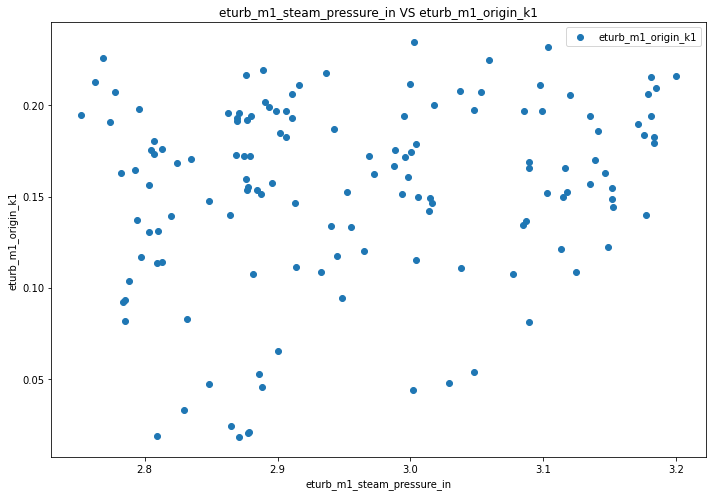

In [12]:
scatter_plot(df_origin, "eturb_m1_steam_pressure_in", "eturb_m1_origin_k1", imgpath = None)

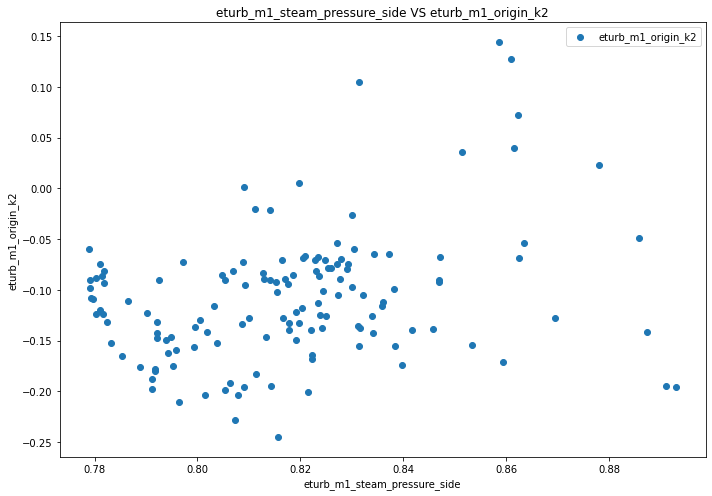

In [15]:
scatter_plot(df_origin, "eturb_m1_steam_pressure_side", "eturb_m1_origin_k2",  imgpath = None)

### Delta k VS pressure

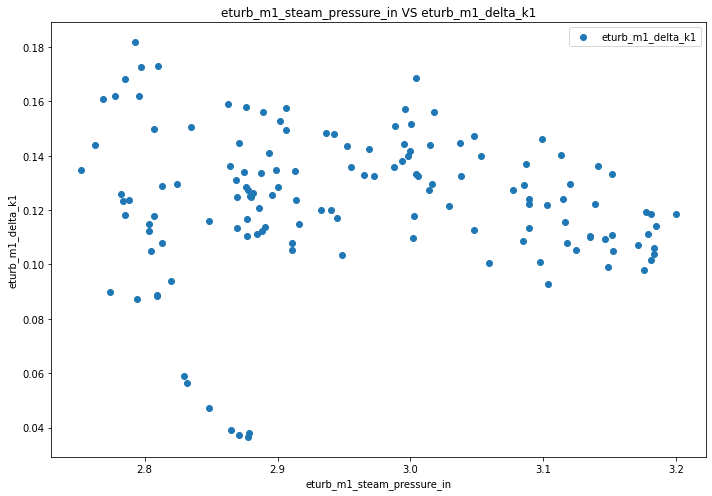

In [16]:
scatter_plot(df_delta, "eturb_m1_steam_pressure_in", "eturb_m1_delta_k1", imgpath = None)

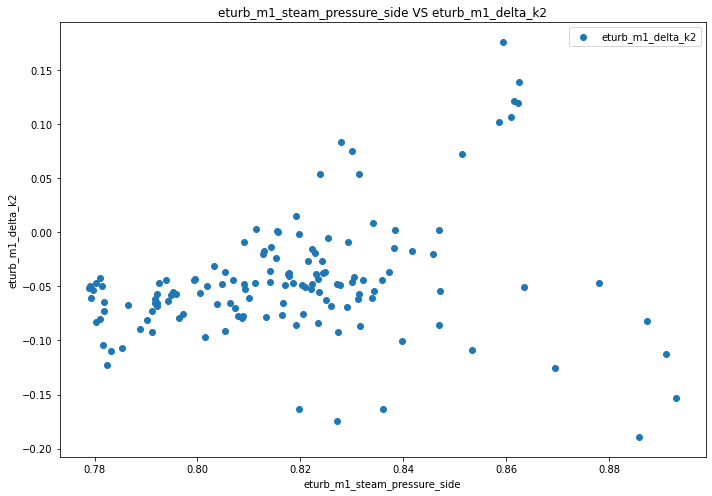

In [17]:
scatter_plot(df_delta, "eturb_m1_steam_pressure_side", "eturb_m1_delta_k2",  imgpath = None)

### Base k VS pressure

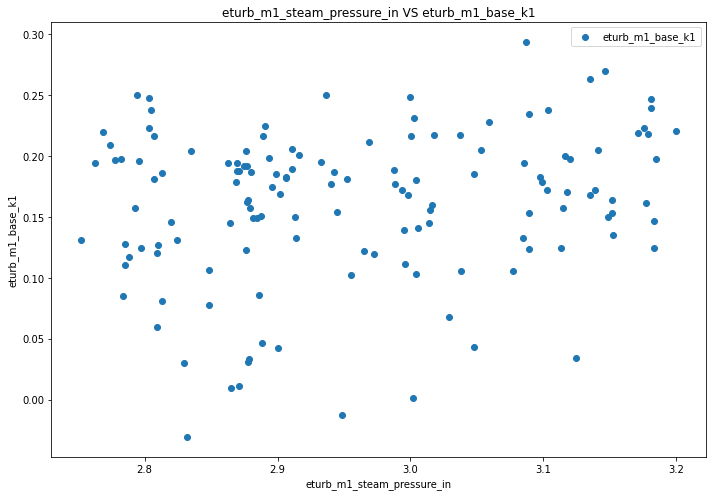

In [18]:
scatter_plot(df_base, "eturb_m1_steam_pressure_in", "eturb_m1_base_k1", imgpath = None)

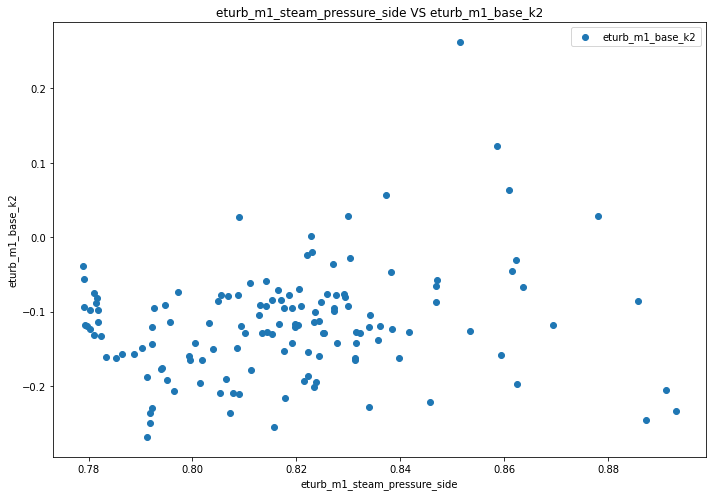

In [19]:
scatter_plot(df_base, "eturb_m1_steam_pressure_side", "eturb_m1_base_k2",  imgpath = None)

In [41]:
# steam_pressure_in group 

group_threshold_2 = 2.7
group_threshold_3 = 2.8
group_threshold_4 = 2.9
group_threshold_5 = 3.0
group_threshold_6 = 3.1
group_threshold_7 = 3.2

temp_df_in_2 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_in"] >= group_threshold_2) & (df_origin["eturb_m1_steam_pressure_in"] < group_threshold_3))]
temp_df_in_3 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_in"] >= group_threshold_3) & (df_origin["eturb_m1_steam_pressure_in"] < group_threshold_4))]
temp_df_in_4 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_in"] >= group_threshold_4) & (df_origin["eturb_m1_steam_pressure_in"] < group_threshold_5))]
temp_df_in_5 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_in"] >= group_threshold_5) & (df_origin["eturb_m1_steam_pressure_in"] < group_threshold_6))]
temp_df_in_6 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_in"] >= group_threshold_6) & (df_origin["eturb_m1_steam_pressure_in"] <= group_threshold_7))]
# print(temp_df_2)
# print(len(temp_df_2))
# print(temp_df_3)
# print(len(temp_df_3))
# print(temp_df_4)
# print(len(temp_df_4))
# print(temp_df_5)
# print(len(temp_df_5))
# print(temp_df_6)
# print(len(temp_df_6))

In [42]:
# steam_pressure_side group
group_threshold_1 = 0
group_threshold_2 = 0.78
group_threshold_3 = 0.80
group_threshold_4 = 0.82
group_threshold_5 = 0.83
group_threshold_6 = 0.84
group_threshold_7 = 0.86
group_threshold_8 = 0.88
group_threshold_9 = 1.0

temp_df_side_1 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_side"] >= group_threshold_1) & (df_origin["eturb_m1_steam_pressure_side"] < group_threshold_2))]
temp_df_side_2 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_side"] >= group_threshold_2) & (df_origin["eturb_m1_steam_pressure_side"] < group_threshold_3))]
temp_df_side_3 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_side"] >= group_threshold_3) & (df_origin["eturb_m1_steam_pressure_side"] < group_threshold_4))]
temp_df_side_4 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_side"] >= group_threshold_4) & (df_origin["eturb_m1_steam_pressure_side"] < group_threshold_5))]
temp_df_side_5 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_side"] >= group_threshold_5) & (df_origin["eturb_m1_steam_pressure_side"] < group_threshold_6))]
temp_df_side_6 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_side"] >= group_threshold_6) & (df_origin["eturb_m1_steam_pressure_side"] < group_threshold_7))]
temp_df_side_7 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_side"] >= group_threshold_7) & (df_origin["eturb_m1_steam_pressure_side"] < group_threshold_8))]
temp_df_side_8 = df_origin.loc[((df_origin["eturb_m1_steam_pressure_side"] >= group_threshold_8) & (df_origin["eturb_m1_steam_pressure_side"] <= group_threshold_9))]
print(temp_df_side_1)
# print(len(temp_df_1))
# print(temp_df_2)
# print(len(temp_df_2))
# print(temp_df_3)
# print(len(temp_df_3))
# print(temp_df_4)
# print(len(temp_df_4))
# print(temp_df_5)
# print(len(temp_df_5))
# print(temp_df_6)
# print(len(temp_df_6))
# print(temp_df_7)
# print(len(temp_df_7))
# print(temp_df_8)
# print(len(temp_df_8))

    eturb_m1_origin_k1  eturb_m1_origin_k2  eturb_m1_steam_pressure_in  \
15            0.133148           -0.059475                    2.955028   
16            0.162275           -0.090176                    2.972458   
17            0.166589           -0.098282                    2.987931   
18            0.151461           -0.108248                    2.993278   
19            0.160707           -0.109072                    2.997889   

    eturb_m1_steam_pressure_side  
15                      0.778931  
16                      0.779194  
17                      0.779167  
18                      0.779222  
19                      0.779667  


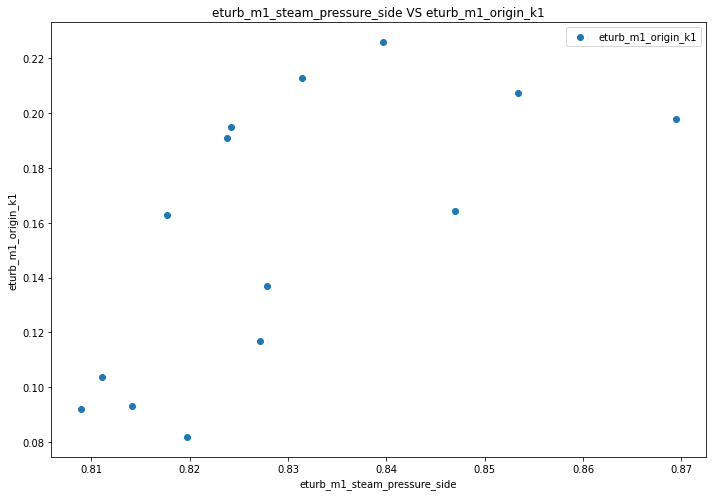

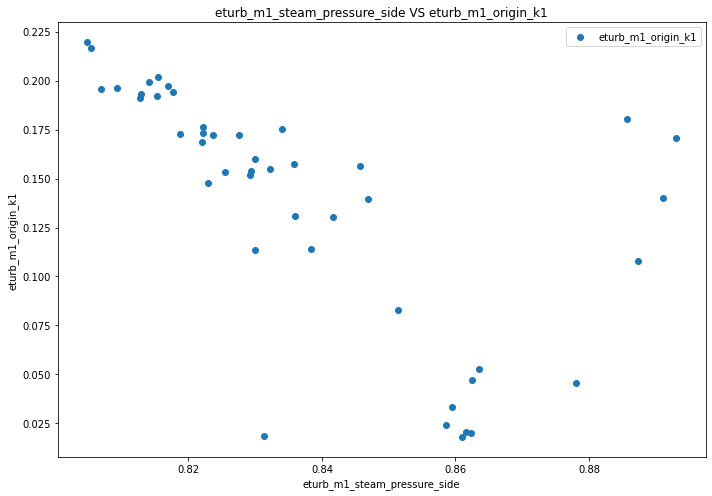

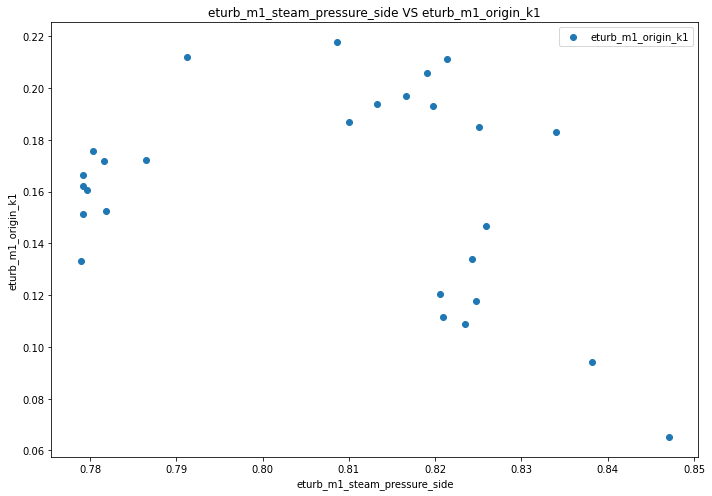

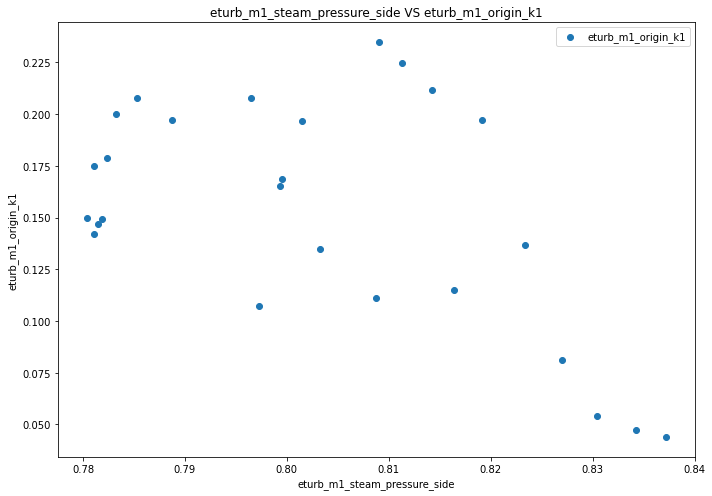

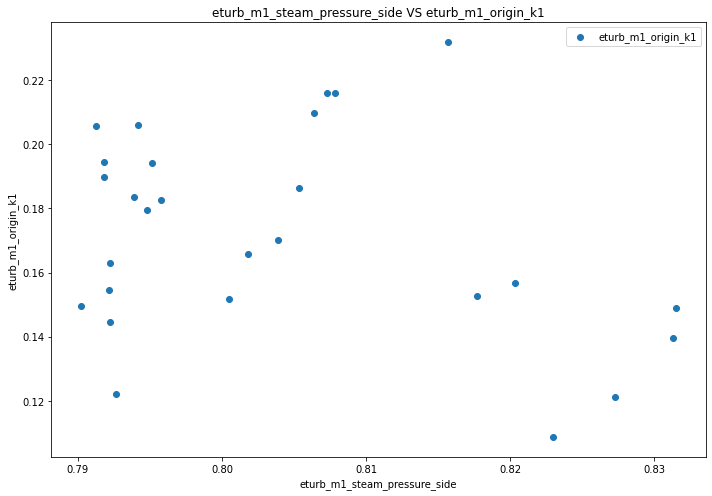

In [48]:
scatter_plot(temp_df_in_2, "eturb_m1_steam_pressure_side", "eturb_m1_origin_k1",  imgpath = None)
scatter_plot(temp_df_in_3, "eturb_m1_steam_pressure_side", "eturb_m1_origin_k1",  imgpath = None)
scatter_plot(temp_df_in_4, "eturb_m1_steam_pressure_side", "eturb_m1_origin_k1",  imgpath = None)
scatter_plot(temp_df_in_5, "eturb_m1_steam_pressure_side", "eturb_m1_origin_k1",  imgpath = None)
scatter_plot(temp_df_in_6, "eturb_m1_steam_pressure_side", "eturb_m1_origin_k1",  imgpath = None)